In [1]:
def sigmoid(x):
  return 1/(1+ np.exp(-x))
def sigmoid_derivative(x):
 return x * (1.0 - x)

import numpy as np
class neural_network:
  def __init__(self,x,y):
    self.input=x
    self.weightS1=np.random.rand(self.input.shape[1],4)
    self.weightS2=np.random.rand(4,1)
    self.y=y
    self.output=np.zeros(self.y.shape)
  def feedforward(self):
    self.layer1=sigmoid(np.dot(self.input,self.weightS1))
    self.output=sigmoid(np.dot(self.layer1,self.weightS2))
  def backprop(self):
    d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
    d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weightS2.T) * sigmoid_derivative(self.layer1)))
    self.weightS1 += d_weights1
    self.weightS2 += d_weights2

In [2]:
if __name__ == "__main__":
 X = np.array([[0,0,1],
 [0,1,1],
 [1,0,1],
 [1,1,1]])
 y = np.array([[0],[1],[1],[0]])
 nn = neural_network(X,y)
 for i in range(1500):
    nn.feedforward()
    nn.backprop()
 print(nn.output)


[[0.02782337]
 [0.97881706]
 [0.97879863]
 [0.02147038]]


In [3]:
import pandas as pd
pd.DataFrame(nn.output).head()

,0
0,0.027823
1,0.978817
2,0.978799
3,0.021470


In [4]:
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(URL, names = ['sepal_length', 'sepal_width','petal_length', 'petal_width', 'class'])

In [5]:
print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


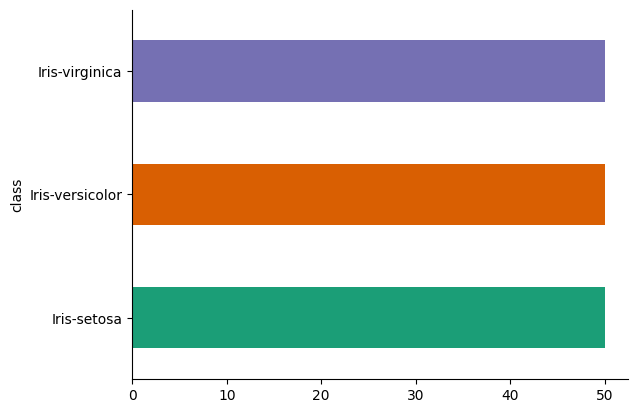

In [6]:
# @title class

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['class']=encoder.fit_transform(df['class'])

df['class'].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

In [14]:
X=df.drop(['class'],axis=1)
y=df['class']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [19]:
X_train = X_train.reshape(-1, 90)

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [26]:
import tensorflow as tf

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))


Epoch 1/50
3/3 [==============================] - 1s 68ms/step - loss: 1.2506 - accuracy: 0.3778 - val_loss: 1.1153 - val_accuracy: 0.4000
Epoch 2/50
3/3 [==============================] - 0s 11ms/step - loss: 1.0924 - accuracy: 0.4000 - val_loss: 1.0394 - val_accuracy: 0.3667
Epoch 3/50
3/3 [==============================] - 0s 11ms/step - loss: 0.9939 - accuracy: 0.3889 - val_loss: 1.0024 - val_accuracy: 0.3667
Epoch 4/50
3/3 [==============================] - 0s 11ms/step - loss: 0.9463 - accuracy: 0.3889 - val_loss: 0.9735 - val_accuracy: 0.4000
Epoch 5/50
3/3 [==============================] - 0s 15ms/step - loss: 0.9077 - accuracy: 0.4667 - val_loss: 0.9528 - val_accuracy: 0.5667
Epoch 6/50
3/3 [==============================] - 0s 11ms/step - loss: 0.8727 - accuracy: 0.6333 - val_loss: 0.9224 - val_accuracy: 0.6000
Epoch 7/50
3/3 [==============================] - 0s 12ms/step - loss: 0.8363 - accuracy: 0.7222 - val_loss: 0.8864 - val_accuracy: 0.6333
Epoch 8/50
3/3 [===========

In [27]:
# Assuming X_test and y_test are your unseen test data
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


1/1 [==============================] - 0s 20ms/step - loss: 0.0765 - accuracy: 1.0000
Test Loss: 0.07649340480566025
Test Accuracy: 1.0


In [30]:
X_test[:1]

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2


In [33]:
model.predict(np.array([[6.1,2.8,4.7,1.2]]))

1/1 [==============================] - 0s 88ms/step


array([[0.00118135, 0.91793203, 0.08088667]], dtype=float32)

In [34]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

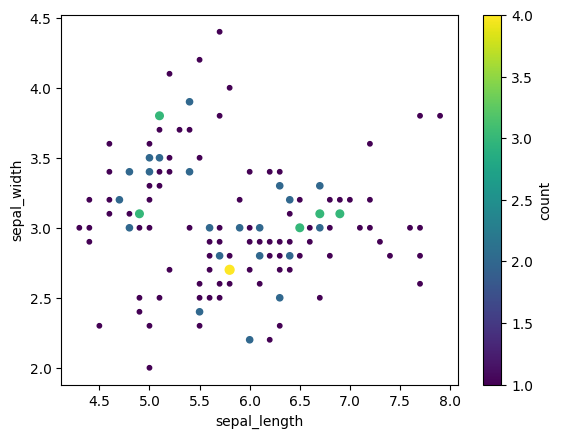

In [41]:
import pandas as pd

# Assuming df is your DataFrame
grouped_data = df.groupby(['sepal_length', 'sepal_width']).size().reset_index(name='count')

# Plotting the scatter plot
grouped_data.plot(kind='scatter', x='sepal_length', y='sepal_width', s=grouped_data['count']*10,c='count', colormap='viridis')


<Axes: title={'center': 'Histogram of Petal Length'}, ylabel='Frequency'>

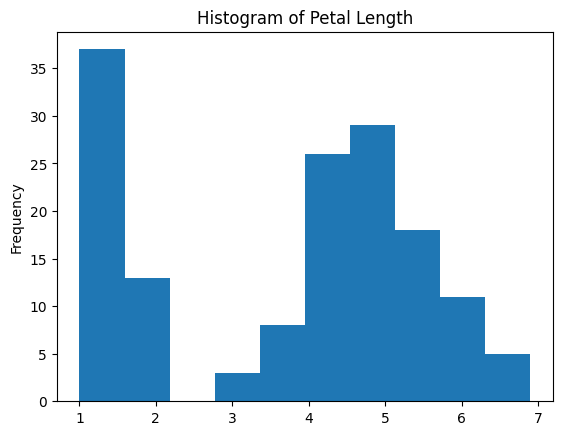

In [42]:
df['petal_length'].plot.hist(title='Histogram of Petal Length')

<Axes: title={'center': 'Boxplot of Sepal Length & Width, and Petal Length &Width'}>

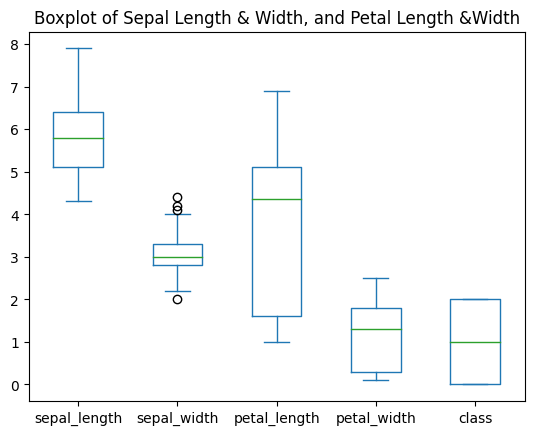

In [43]:
df.plot.box(title='Boxplot of Sepal Length & Width, and Petal Length &Width')

# Project 1-- diabete--

In [44]:
df=pd.read_csv('/content/diabetes.csv')
print(df.shape)

(768, 9)


In [45]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [49]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [68]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
 missing_rows = df.loc[df[col]==0].shape[0]
 print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [70]:
df['Glucose']=df['Glucose'].replace(0,np.nan)
df['BloodPressure']=df['BloodPressure'].replace(0,np.nan)
df['SkinThickness']=df['SkinThickness'].replace(0,np.nan)
df['Insulin']=df['Insulin'].replace(0,np.nan)
df['BMI']=df['BMI'].replace(0,np.nan)

In [71]:
df['Glucose']=df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].fillna(df['Insulin'].mean())
df['BMI']=df['BMI'].fillna(df['BMI'].mean())

In [72]:
X=df.drop(['Outcome'],axis=1)
y=df['Outcome']

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [86]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_val_scaled=scaler.transform(X_val)

In [103]:
import tensorflow as tf

# Define a callback function
callback = tf.keras.callbacks.EarlyStopping(patience=3)  # Example of using EarlyStopping callback

# Set random seed
tf.random.set_seed(41)

# Define the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.0027),  # Use default learning rate
              metrics=['accuracy'])

# Define the learning rate scheduler callback
def lr_scheduler(epoch, lr):
    return lr * tf.math.exp(-0.1)  # Exponential decay of learning rate

# Train the model with the callback and learning rate scheduler
history2 = model2.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled,y_val))


Epoch 1/50
16/16 [==============================] - 1s 12ms/step - loss: 0.5526 - accuracy: 0.7189 - val_loss: 0.4728 - val_accuracy: 0.8049
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4665 - accuracy: 0.7617 - val_loss: 0.4575 - val_accuracy: 0.7967
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4499 - accuracy: 0.7576 - val_loss: 0.4694 - val_accuracy: 0.7967
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4388 - accuracy: 0.7719 - val_loss: 0.4695 - val_accuracy: 0.7886
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4310 - accuracy: 0.7821 - val_loss: 0.4615 - val_accuracy: 0.8049
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4266 - accuracy: 0.7923 - val_loss: 0.4523 - val_accuracy: 0.7967
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4214 - accuracy: 0.7923 - val_loss: 0.4635 - val_accuracy: 0.7724
Epoch 8/50
16/16 [=

In [84]:
model2.evaluate(X_test,y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.4969 - accuracy: 0.7727


[0.496890127658844, 0.7727272510528564]

In [102]:
import tensorflow as tf

# Define a callback function
callback = tf.keras.callbacks.EarlyStopping(patience=3)  # Example of using EarlyStopping callback

# Set random seed
tf.random.set_seed(42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.01),  # Use default learning rate
              metrics=['accuracy'])

# Define the learning rate scheduler callback
def lr_scheduler(epoch, lr):
    return lr * tf.math.exp(-0.1)  # Exponential decay of learning rate

# Train the model with the callback and learning rate scheduler
history = model.fit(X_train_scaled, y_train, epochs=25, callbacks=[callback, tf.keras.callbacks.LearningRateScheduler(lr_scheduler)])


Epoch 1/25
 1/16 [>.............................] - ETA: 15s - loss: 0.7295 - accuracy: 0.5312

16/16 [==============================] - 1s 3ms/step - loss: 0.5385 - accuracy: 0.7373 - lr: 0.0090
Epoch 2/25
 1/16 [>.............................] - ETA: 0s - loss: 0.5740 - accuracy: 0.7188

16/16 [==============================] - 0s 3ms/step - loss: 0.4451 - accuracy: 0.7780 - lr: 0.0082
Epoch 3/25
 1/16 [>.............................] - ETA: 0s - loss: 0.5158 - accuracy: 0.7188

16/16 [==============================] - 0s 2ms/step - loss: 0.4341 - accuracy: 0.7882 - lr: 0.0074
Epoch 4/25
 1/16 [>.............................] - ETA: 0s - loss: 0.3899 - accuracy: 0.8125

16/16 [==============================] - 0s 2ms/step - loss: 0.4246 - accuracy: 0.8024 - lr: 0.0067
Epoch 5/25
 1/16 [>.............................] - ETA: 0s - loss: 0.3428 - accuracy: 0.8750

16/16 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8065 - lr: 0.0061
Epoch 6/25
 1/16 [>.............................] - ETA: 0s - loss: 0.5289 - accuracy: 0.6250

16/16 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.7984 - lr: 0.0055
Epoch 7/25
 1/16 [>.............................] - ETA: 0s - loss: 0.3029 - accuracy: 0.8750

16/16 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.7984 - lr: 0.0050
Epoch 8/25
 1/16 [>.............................] - ETA: 0s - loss: 0.3069 - accuracy: 0.8438

16/16 [==============================] - 0s 2ms/step - loss: 0.3859 - accuracy: 0.8289 - lr: 0.0045
Epoch 9/25
 1/16 [>.............................] - ETA: 0s - loss: 0.4740 - accuracy: 0.7812

16/16 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.8167 - lr: 0.0041
Epoch 10/25
 1/16 [>.............................] - ETA: 0s - loss: 0.2547 - accuracy: 0.8438

16/16 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.8045 - lr: 0.0037
Epoch 11/25
 1/16 [>.............................] - ETA: 0s - loss: 0.2739 - accuracy: 0.9062

16/16 [==============================] - 0s 3ms/step - loss: 0.3869 - accuracy: 0.8167 - lr: 0.0033
Epoch 12/25
 1/16 [>.............................] - ETA: 0s - loss: 0.2732 - accuracy: 0.9062

16/16 [==============================] - 0s 2ms/step - loss: 0.3686 - accuracy: 0.8269 - lr: 0.0030
Epoch 13/25
 1/16 [>.............................] - ETA: 0s - loss: 0.3481 - accuracy: 0.8438

16/16 [==============================] - 0s 3ms/step - loss: 0.3635 - accuracy: 0.8289 - lr: 0.0027
Epoch 14/25
 1/16 [>.............................] - ETA: 0s - loss: 0.3218 - accuracy: 0.8750

16/16 [==============================] - 0s 3ms/step - loss: 0.3577 - accuracy: 0.8473 - lr: 0.0025
Epoch 15/25
 1/16 [>.............................] - ETA: 0s - loss: 0.4873 - accuracy: 0.7188

16/16 [==============================] - 0s 3ms/step - loss: 0.3511 - accuracy: 0.8411 - lr: 0.0022
Epoch 16/25
 1/16 [>.............................] - ETA: 0s - loss: 0.3769 - accuracy: 0.7812

16/16 [==============================] - 0s 3ms/step - loss: 0.3465 - accuracy: 0.8310 - lr: 0.0020
Epoch 17/25
 1/16 [>.............................] - ETA: 0s - loss: 0.3122 - accuracy: 0.8750

16/16 [==============================] - 0s 3ms/step - loss: 0.3411 - accuracy: 0.8391 - lr: 0.0018
Epoch 18/25
 1/16 [>.............................] - ETA: 0s - loss: 0.5433 - accuracy: 0.7500

16/16 [==============================] - 0s 3ms/step - loss: 0.3388 - accuracy: 0.8432 - lr: 0.0017
Epoch 19/25
 1/16 [>.............................] - ETA: 0s - loss: 0.3031 - accuracy: 0.8438

16/16 [==============================] - 0s 3ms/step - loss: 0.3353 - accuracy: 0.8452 - lr: 0.0015
Epoch 20/25
 1/16 [>.............................] - ETA: 0s - loss: 0.3155 - accuracy: 0.8438

16/16 [==============================] - 0s 3ms/step - loss: 0.3328 - accuracy: 0.8452 - lr: 0.0014
Epoch 21/25
 1/16 [>.............................] - ETA: 0s - loss: 0.2880 - accuracy: 0.7812

16/16 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8411 - lr: 0.0012
Epoch 22/25
 1/16 [>.............................] - ETA: 0s - loss: 0.3380 - accuracy: 0.8438

16/16 [==============================] - 0s 3ms/step - loss: 0.3286 - accuracy: 0.8452 - lr: 0.0011
Epoch 23/25
 1/16 [>.............................] - ETA: 0s - loss: 0.2916 - accuracy: 0.8750

16/16 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.8493 - lr: 0.0010
Epoch 24/25
 1/16 [>.............................] - ETA: 0s - loss: 0.2939 - accuracy: 0.9375

16/16 [==============================] - 0s 3ms/step - loss: 0.3230 - accuracy: 0.8432 - lr: 9.0718e-04
Epoch 25/25
 1/16 [>.............................] - ETA: 0s - loss: 0.2434 - accuracy: 0.9062

16/16 [==============================] - 0s 3ms/step - loss: 0.3213 - accuracy: 0.8473 - lr: 8.2085e-04


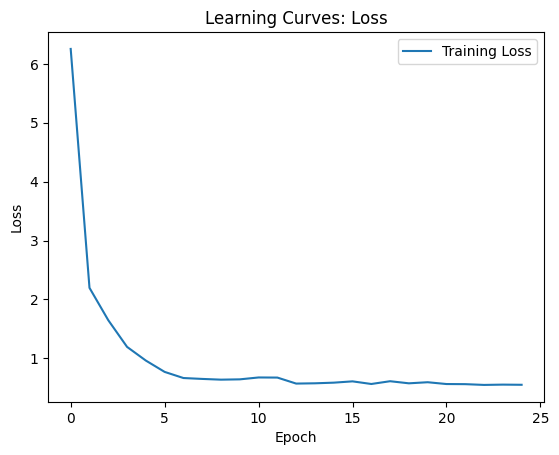

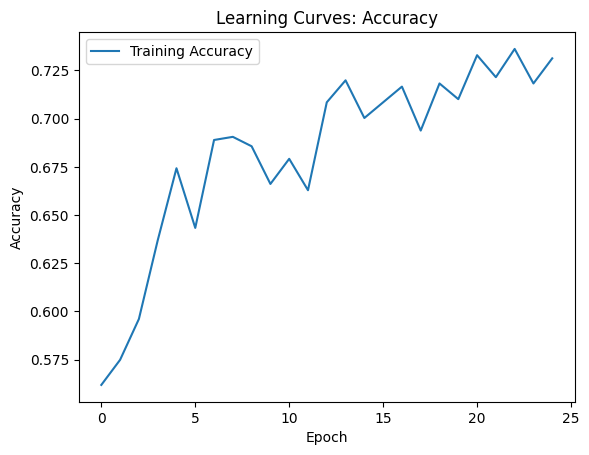

In [64]:
import matplotlib.pyplot as plt

# Plot the learning curves for loss
plt.plot(history.history['loss'], label='Training Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curves: Loss')
plt.legend()
plt.show()

# Plot the learning curves for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Learning Curves: Accuracy')
plt.legend()
plt.show()


In [88]:
X_train.shape

(491, 8)

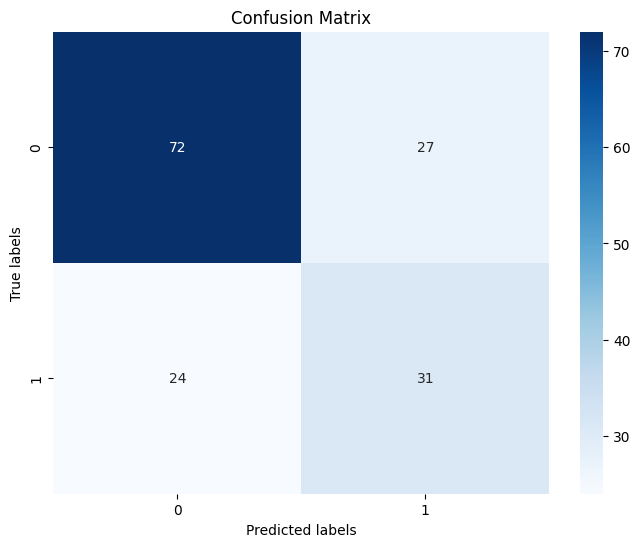

In [97]:
import numpy as np

# Convert predicted probabilities to binary predictions
y_test_pred_binary = np.where(y_test_pred > 0.5, 1, 0)

# Calculate confusion matrix
c_matrix = confusion_matrix(y_test, y_test_pred_binary)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [104]:
model2.evaluate(X_test,y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.7270 - accuracy: 0.6818


[0.7269858717918396, 0.6818181872367859]

In [107]:
!git init


!git add .


!git commit -m "Initial commit"


!git remote add origin https://github.com/bachbech/Machine_learning_projects.git
!git config --global user.email "bachbech20@gmail.com"
!git config --global user.name "bachbech"

# Push your changes to GitHub
!git push origin main

Reinitialized existing Git repository in /content/.git/
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@7a98a40e472d.(none)')
error: remote origin already exists.
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/bachbech/Machine_learning_projects.git'
